<a href="https://colab.research.google.com/github/kurkur19/Analysis-BMD-Al-Khmuz-BS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%9A%D0%9F_%E2%84%966.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6 Комп'ютерний практикум

##Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

##Імпорт власних даних

In [3]:
cereals = pd.read_csv("https://raw.githubusercontent.com/kurkur19/Analysis-BMD-Al-Khmuz-BS-25/data/cereal.csv")

Для нагядності, виведемо наш датасет (усю нашу таблицю):

In [4]:
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973;;
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679;;
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505;;
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912;;
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174;;
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301;;
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445;;
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193;;


Для зручності виведемо лише ті категорії, над якими ми будемо працювати.

Так як наш датасет містить в собі 2 категорільних змінних, одна з яких (холодний або гарячий) містить в собі 2 типи данних, а інша (Виробник пластівців) містить достатньо багато. Тому спробуємо вивести лише три типи даних, які є найбільшими в цій категоріальній змінній:

In [11]:
top_3 = cereals["mfr"].value_counts().nlargest(3).index
top_3

Index(['K', 'G', 'P'], dtype='object')

In [37]:
types = ['K', 'G', 'N']


де маємо таких виробників, як: "K" - "Kelloggs"; "G" - "General Mills"; "P" - "Post";

##№1

Відібраємо на Kaggle.com набір даних, який містить як мінімум 2
категоріальні змінні та одну кількісну. Якщо категоріальна змінна містить
більше ніж 3 градації - залишити лише ті групи є найбільшими.


Як категоріальні змінні візьмемо 'mfr' та 'type', (Виробник пластівців та холодний або гарячий відповідно). А як одну кількісну змінну візьмемо саме 'sugars' (грам цукрів)

In [38]:
c = cereals[cereals['mfr'].isin(types)][['mfr', 'type', 'sugars']]
c

,mfr,type,sugars
0,N,C,6
2,K,C,5
3,K,C,0
5,G,C,10
6,K,C,14
7,G,C,8
11,G,C,1
12,G,C,9
13,G,C,7
14,G,C,13


##№2

Перевірити розподіл на нормальність за допомогою будь-якого критерію
та зробити відповідні висновки.


In [39]:
shapiro_test_sugars = stats.shapiro(cereals["sugars"])
shapiro_test_sugars

ShapiroResult(statistic=0.952474057674408, pvalue=0.005922925658524036)

Після перевірки розподілу на нормальність за допомогою теста Шапіро-Вілка, ми дізналися, що наше Р-значення більше за число 0,005, тому можемо сміливо сказати, що в нас  немає достатніх доказів відкинути нульову гіпотезу, що означає відсутність статистично значущої різниці між середніми двох груп.


##№3

Дати коротку характеристику кожній з груп за кількісною: розрахувати
кількість спостережень, середнє значення та стандартне відхилення. Аналіз
робити при розділенні на групи спочатку окремо за категоріальними змінними
(наприклад, оцінити групи окремо при розділенні на стать і окремо на діагноз), а
потім сумісно (наприклад, стать та діагноз одночасно).


За категоріальними змінними:

In [40]:
c.groupby("mfr")["sugars"].agg(["count", "mean", "std"])

,count,mean,std
mfr,,,
G,22,7.954545,3.872704
K,23,7.565217,4.500768
N,6,1.833333,2.857738


In [41]:
c.groupby("type")["sugars"].agg(["count", "mean", "std"])

,count,mean,std
type,,,
C,50,7.2,4.375255
H,1,0.0,NaN


Сумісно:


In [44]:
grouped_stats = c.groupby(['mfr', 'type'])['sugars'].agg(['count', 'mean', 'std'])
grouped_stats

count      mean       std
mfr type                           
G   C        22  7.954545  3.872704
K   C        23  7.565217  4.500768
N   C         5  2.200000  3.033150
    H         1  0.000000       NaN

##№4

Візуалізувати групи за допомогою ящикових діаграм.

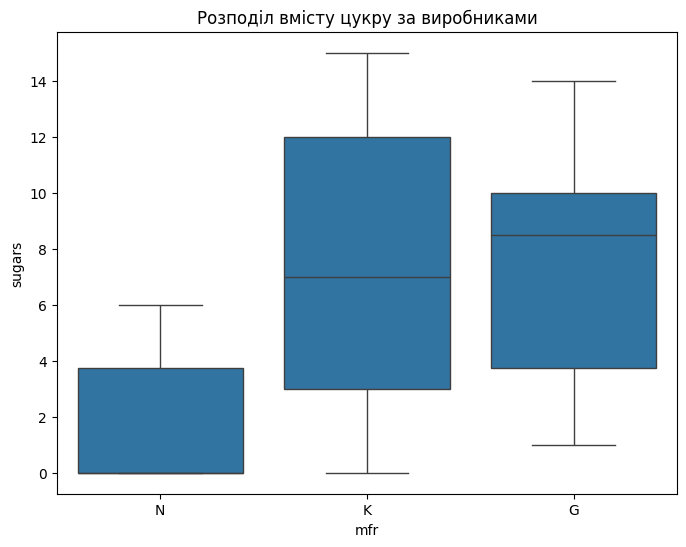

In [47]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='mfr', y='sugars', data=c)
plt.title('Розподіл вмісту цукру за виробниками')
plt.show()

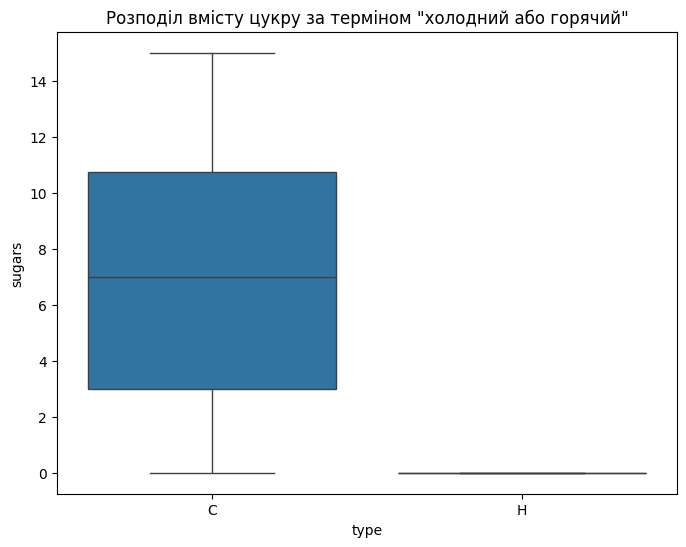

In [48]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='sugars', data=c)
plt.title('Розподіл вмісту цукру за терміном "холодний або горячий"')
plt.show()